Possible solution to exercise 8.1 using Python.

One way is to use Python's symbolic algebra package SymPy.
We begin by importing SymPy and defining the symbols - I will use $x$,$y$,$z$, and $\alpha$.

In [2]:
import sympy as sp
x,y,z,alpha = sp.symbols('x y z alpha')

We can now define f symbolically

In [11]:
f = 2*x**2 + x*y + y**2 + y*z + z**2 - 6*x - 7*y - 8*z + 9
f

2*x**2 + x*y - 6*x + y**2 + y*z - 7*y + z**2 - 8*z + 9

Let us calculate the gradient:

In [12]:
df = sp.Matrix([f.diff(x),f.diff(y),f.diff(z)])
df

Matrix([
[    4*x + y - 6],
[x + 2*y + z - 7],
[    y + 2*z - 8]])

Search direction:

In [13]:
p = sp.Matrix([1,2,0])

Let us now verify that $\nabla f(0,0,0)^T p < 0$, that is that $p$ is a descent direction at $0$:

In [33]:
df0 = df.subs([(x,0),(y,0),(z,0)])
df0.dot(p)

-20

Let us now solve for $\alpha$ satisfying the sufficient decrease condition:

In [31]:
c1 = 4/5
f_alpha = f.subs([(x,0+alpha*p[0]),(y,0+alpha*p[1]),(z,0+alpha*p[2])])
f0      = f_alpha.subs(alpha,0)
sp.solve(f_alpha <= f0 + c1*alpha*df0.dot(p))

(0 <= alpha) & (alpha <= 0.5)

Therefore the sufficient decrease condition is satisfied, if $\alpha \in [0,0.5]$

Of course not everything can be done using symbolic computations.  One could e.g. plot a picture and see approximately where the lines intersect: 

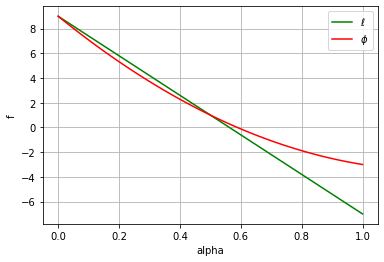

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2*x[0]**2 + x[0]*x[1] + x[1]**2 + x[1]*x[2] + x[2]**2 - 6*x[0] - 7*x[1] - 8*x[2] + 9

def df(x):
    return np.array([4*x[0]+x[1]-6, x[0]+2*x[1]+x[2]-7, x[1]+2*x[2]-8])

x0= np.zeros(3)
p = np.array([1.0, 2.0, 0.0])
c1= 4/5.

def phi(alpha):
    return f(x0 + alpha*p)

def ell(alpha):
    return f(x0) + c1*alpha*df(x0).dot(p)

alpha = np.linspace(0,1.0,100)
plt.plot(alpha, ell(alpha), 'g', label='$\ell$')
plt.plot(alpha, np.vectorize(phi)(alpha), 'r', label='$\phi$')
plt.xlabel('alpha')
plt.ylabel('f')
plt.grid(True)
plt.legend(loc='upper right')

After this, we could run for example the classical bisection algorithm to find out more precisely, where the lines intersect.  Indeed, we can see that for $\alpha = 0.2$ the green line is above the red (sufficient decrease is satisfied) whereas for $\alpha = 1.0$ is below.  This could be our initial bracket.

In [58]:
alpha_min = 0.2
alpha_max = 1.0

while alpha_max - alpha_min > 1.0E-10:
    alpha = 0.5*(alpha_min + alpha_max)
    print('Current bracket: [%e, %e]' % (alpha_min, alpha_max))
    if ell(alpha)>phi(alpha):
        alpha_min = alpha
    else:
        alpha_max = alpha

print('Final alpha = %e' % alpha)

Current bracket: [2.000000e-01, 1.000000e+00]
Current bracket: [2.000000e-01, 6.000000e-01]
Current bracket: [4.000000e-01, 6.000000e-01]
Current bracket: [4.000000e-01, 5.000000e-01]
Current bracket: [4.500000e-01, 5.000000e-01]
Current bracket: [4.750000e-01, 5.000000e-01]
Current bracket: [4.875000e-01, 5.000000e-01]
Current bracket: [4.937500e-01, 5.000000e-01]
Current bracket: [4.968750e-01, 5.000000e-01]
Current bracket: [4.984375e-01, 5.000000e-01]
Current bracket: [4.992187e-01, 5.000000e-01]
Current bracket: [4.996094e-01, 5.000000e-01]
Current bracket: [4.998047e-01, 5.000000e-01]
Current bracket: [4.999023e-01, 5.000000e-01]
Current bracket: [4.999512e-01, 5.000000e-01]
Current bracket: [4.999756e-01, 5.000000e-01]
Current bracket: [4.999878e-01, 5.000000e-01]
Current bracket: [4.999939e-01, 5.000000e-01]
Current bracket: [4.999969e-01, 5.000000e-01]
Current bracket: [4.999985e-01, 5.000000e-01]
Current bracket: [4.999992e-01, 5.000000e-01]
Current bracket: [4.999996e-01, 5.